# 机器学习练习-支持向量机
代码更新地址：https://github.com/fengdu78/WZU-machine-learning-course


代码修改并注释：黄海广，haiguang2000@wzu.edu.cn 

在本练习中，我们将使用支持向量机（SVM）来构建垃圾邮件分类器。 我们将从一些简单的2D数据集开始使用SVM来查看它们的工作原理。 然后，我们将对一组原始电子邮件进行一些预处理工作，并使用SVM在处理的电子邮件上构建分类器，以确定它们是否为垃圾邮件。

我们要做的第一件事是看一个简单的二维数据集，看看线性SVM如何对数据集进行不同的C值（类似于线性/逻辑回归中的正则化项）。 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import warnings

warnings.simplefilter("ignore")

我们将其用散点图表示，其中类标签由符号表示（+表示正类，o表示负类）。

In [3]:
data1 = pd.read_csv('data/svmdata1.csv')

In [4]:
data1.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


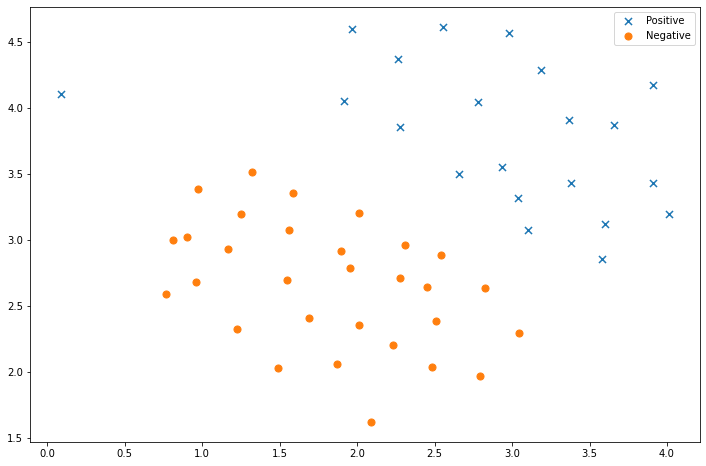

In [5]:
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

请注意，还有一个异常的正例在其他样本之外。
这些类仍然是线性分离的，但它非常紧凑。 我们要训练线性支持向量机来学习类边界。 在这个练习中，我们没有从头开始执行SVM的任务，所以我要用scikit-learn。

In [6]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

首先，我们使用 C=1 看下结果如何。

In [7]:
svc.fit(data1[['X1', 'X2']], data1['y'])
svc.score(data1[['X1', 'X2']], data1['y'])

0.9803921568627451

其次，让我们看看如果C的值越大，会发生什么

In [8]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data1[['X1', 'X2']], data1['y'])
svc2.score(data1[['X1', 'X2']], data1['y'])

0.9411764705882353

这次我们得到了训练数据的完美分类，但是通过增加C的值，我们创建了一个不再适合数据的决策边界。 我们可以通过查看每个类别预测的置信水平来看出这一点，这是该点与超平面距离的函数。

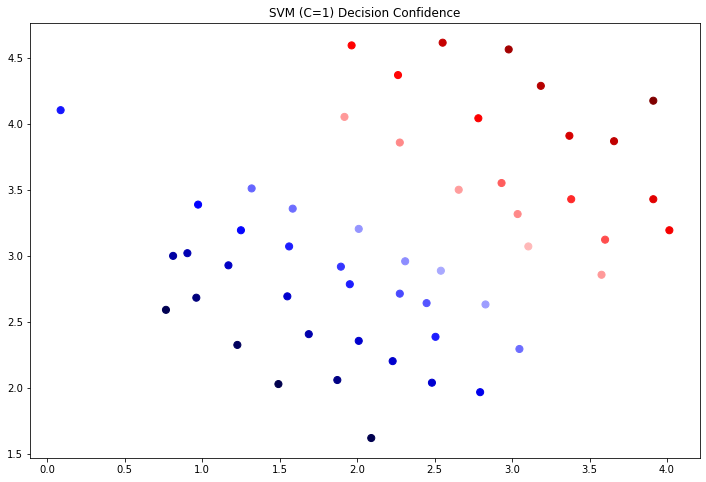

In [9]:
data1['SVM 1 Confidence'] = svc.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data1['X1'],
           data1['X2'],
           s=50,
           c=data1['SVM 1 Confidence'],
           cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

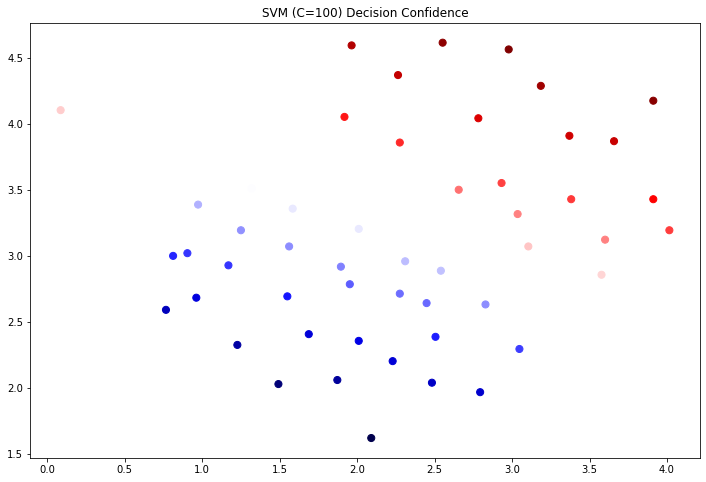

In [10]:
data1['SVM 2 Confidence'] = svc2.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data1['X1'], data1['X2'], s=50, c=data1['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

可以看看靠近边界的点的颜色，区别是有点微妙。 如果您在练习文本中，则会出现绘图，其中决策边界在图上显示为一条线，有助于使差异更清晰。

现在我们将从线性SVM转移到能够使用内核进行非线性分类的SVM。 我们首先负责实现一个高斯核函数。 虽然scikit-learn具有内置的高斯内核，但为了实现更清楚，我们将从头开始实现。

In [11]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2)**2) / (2 * (sigma**2))))

In [12]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

该结果与练习中的预期值相符。 接下来，我们将检查另一个数据集，这次用非线性决策边界。

In [13]:
data2 = pd.read_csv('data/svmdata2.csv')

In [14]:
data2.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


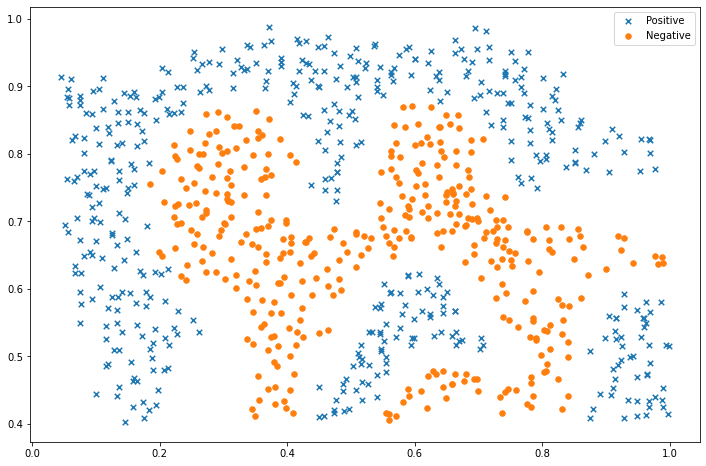

In [15]:
positive = data2[data2['y'].isin([1])]
negative = data2[data2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

对于该数据集，我们将使用内置的RBF内核构建支持向量机分类器，并检查其对训练数据的准确性。 为了可视化决策边界，这一次我们将根据实例具有负类标签的预测概率来对点做阴影。 从结果可以看出，它们大部分是正确的。

In [16]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [17]:
svc.fit(data2[['X1', 'X2']], data2['y'])
svc.score(data2[['X1', 'X2']], data2['y'])

0.9698725376593279

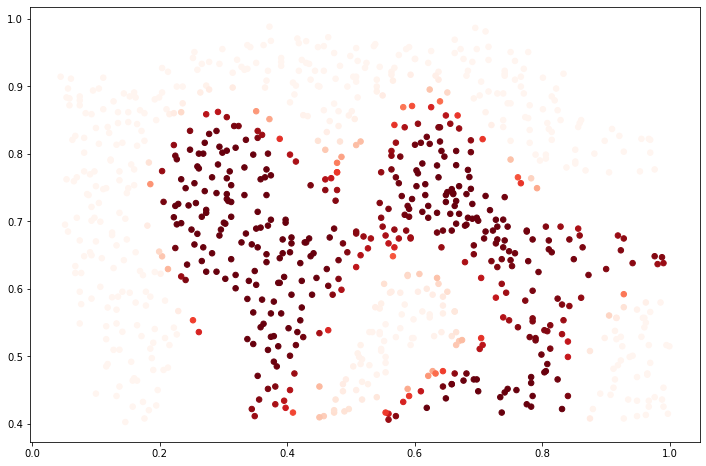

In [18]:
data2['Probability'] = svc.predict_proba(data2[['X1', 'X2']])[:, 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data2['X1'], data2['X2'], s=30, c=data2['Probability'], cmap='Reds')
plt.show()

对于第三个数据集，我们给出了训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。 虽然我们可以使用scikit-learn的内置网格搜索来做到这一点，但是本着遵循练习的目的，我们将从头开始实现一个简单的网格搜索。

In [19]:
data3=pd.read_csv('data/svmdata3.csv')
data3val=pd.read_csv('data/svmdata3val.csv')

In [20]:
X = data3[['X1','X2']]
Xval = data3val[['X1','X2']]
y = data3['y'].ravel()
yval = data3val['yval'].ravel()

In [21]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

# 大间隔分类器

In [22]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [23]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [24]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


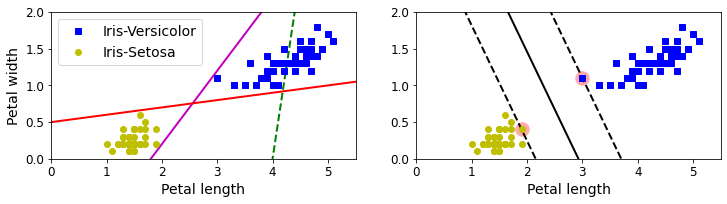

In [25]:
plt.figure(figsize=(12, 2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# 特征缩放的敏感性

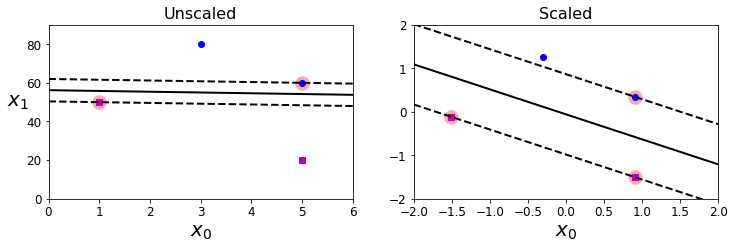

In [26]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

# 硬间隔和软间隔分类

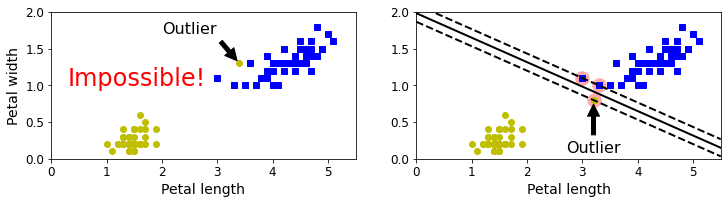

In [27]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12, 2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs")
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [30]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [31]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

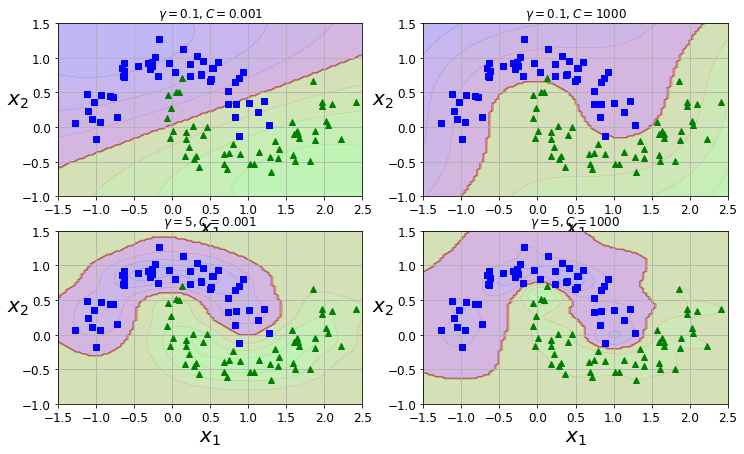

In [32]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf",
                                    SVC(kernel="rbf", gamma=gamma, C=C))])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(12, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=12)

plt.show()

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i,-1] == 0:
            data[i,-1] = -1
    # print(data)
    return data[:,:2], data[:,-1]

In [35]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

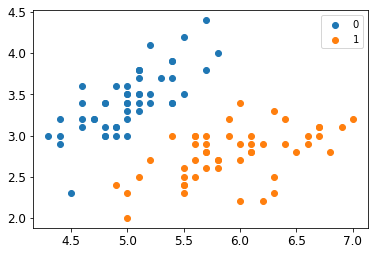

In [36]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [37]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel

    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0

        # 将Ei保存在一个列表里
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        # 松弛变量
        self.C = 1.0

    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1

    # g(x)预测值，输入xi（X[i]）
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r

    # 核函数
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1)**2

        return 0

    # E（x）为g(x)对输入x的预测值和y的差
    def _E(self, i):
        return self._g(i) - self.Y[i]

    def _init_alpha(self):
        # 外层循环首先遍历所有满足0<a<C的样本点，检验是否满足KKT
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        # 否则遍历整个训练集
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue

            E1 = self.E[i]
            # 如果E2是+，选择最小的；如果E2是负的，选择最大的
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j

    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha

    def fit(self, features, labels):
        self.init_args(features, labels)

        for t in range(self.max_iter):
            # train
            i1, i2 = self._init_alpha()

            # 边界
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
                H = min(self.C, self.alpha[i1] + self.alpha[i2])
            else:
                L = max(0, self.alpha[i2] - self.alpha[i1])
                H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])

            E1 = self.E[i1]
            E2 = self.E[i2]
            # eta=K11+K22-2K12
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(
                self.X[i2],
                self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                # print('eta <= 0')
                continue

            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (
                E1 - E2) / eta  #此处有修改，根据书上应该是E1 - E2，书上130-131页
            alpha2_new = self._compare(alpha2_new_unc, L, H)

            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (
                self.alpha[i2] - alpha2_new)

            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b

            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                # 选择中点
                b_new = (b1_new + b2_new) / 2

            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new

            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
        return 'train done!'

    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])

        return 1 if r > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)

    def _weight(self):
        # linear model
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

In [38]:
svm = SVM(max_iter=100)
svm.fit(X_train, y_train)

'train done!'

In [39]:
svm.score(X_test, y_test)

0.6

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.